# Unsupervised Learning: $K$-Means Clustering

## Authors: Kyle Sung, James Cheng, Saffron Magoon, Lucas Merla


In [1]:
from src.utils import load_dataframe
from src.constants import DATA_DIR

df = load_dataframe(DATA_DIR / "data_cleaned_PersonalProperty_encoded.csv")
df.head()

Data loaded successfully.


,student_id,name,class,gpa,is_greek,is_on_campus,distance_to_campus,is_female,is_sprinklered,claim_id,amount,risk_tier,holdout,Business,Humanities,Other,Science
0,1,"Saiz, Leslie",3,1.203913,0,0,0.000000,0.0,1,0,0.0,2,0,0,1,0,0
1,2,"Reddy, Dawna",3,0.609616,0,0,0.000000,1.0,1,0,0.0,2,0,0,0,0,1
2,3,"Rivera, Johnna",3,3.073385,0,1,0.223942,1.0,0,0,0.0,2,0,1,0,0,0
3,4,"al-Jamil, Umaira",4,3.224736,0,0,0.000000,0.0,0,0,0.0,3,0,1,0,0,0
4,5,"el-Mohammed, Qutb",2,2.687851,0,0,0.000000,1.0,0,0,0.0,1,0,1,0,0,0


In [2]:
df_ = df.drop(
    columns=["holdout", "student_id", "name", "claim_id", "is_female"]
)
df_.head()

,class,gpa,is_greek,is_on_campus,distance_to_campus,is_sprinklered,amount,risk_tier,Business,Humanities,Other,Science
0,3,1.203913,0,0,0.000000,1,0.0,2,0,1,0,0
1,3,0.609616,0,0,0.000000,1,0.0,2,0,0,0,1
2,3,3.073385,0,1,0.223942,0,0.0,2,1,0,0,0
3,4,3.224736,0,0,0.000000,0,0.0,3,1,0,0,0
4,2,2.687851,0,0,0.000000,0,0.0,1,1,0,0,0


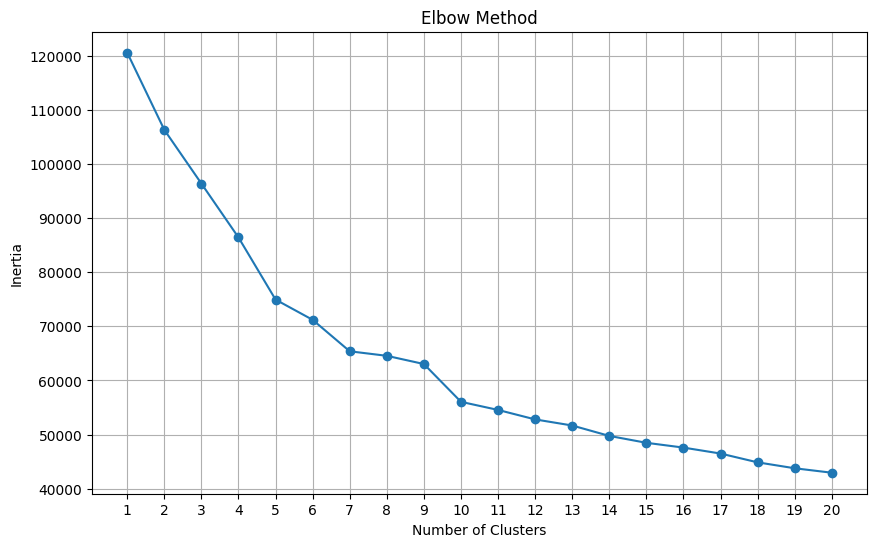

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_)

inertia = []
cluster_range = range(1, 21)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()